<img src = "images/atulogo.png" width="200" height="200">  



                         Title:  A Review of the Wisconsin BreastCancer Data Set


                                   ...Tables of Contents...  
                                   
                                       1. Introduction 
                                       2. Background 
                                       3. Calculations
                                       4. Conclusion 
                                       5. References 
                                       
                                    ........................

### 1. Introduction

<img src="images/bcLogo.png" width="128" height="128">

The goal if this project is to evaluate the Wisconsin Breast Cancer dataset. This dataset was obtained from the University of Wisconsin by Dr. William H. Wolberg (January 8, 1991). The dataset contains a variety of tumour characteristics that are graded on a scale of 1-10 and classed as either Benign (2) or Malignant (4). 

Within this project the following will be conducted: 

• analysis/review of the dataset with an overview and background.

• literature review on classifiers which have been applied to the dataset and compare their performance. 

• machine learning algorithms, train a set of classifiers on the dataset (using SKLearn) and present classification performance results. 


### 2. Background

Breast cancer is the leading cancer type globally accounting for 12.5% of all new annual cancer cases worldwide [6, 7]. On average 1 in 8 women are diagnoised with breast cancer in their life and in men the statistics are 1 in 833 [7]. In a 2012 study of the on estimate there were 464 000 cases of female breast cancer in Europe and 131 000 deaths. 

The disease is caused when the growth of cells in the breast tissue becomes unregulated and the cells experience exponential growth [9.] Breast cancer commonly presents itself as a breast lump which is usually painless. [6] Roughly 15% of women diagnoised with breast cancer have a 1st degree relative (i.e. mother, sister) who have also been diagnoised with breast cancer leading to the hypothesis that the development of the disease has a genenic aspectic [7.] 

<b> Genetic of breast cancer :

Mutations in the BRCA1,BRCA2, p53 and Cowden disease gene are associated with the development of genetic breast cancer [8]. Of these mutations the BRCA1 and BRCA2 gene mutations are the most common and account for 80% of hereditary breast cancer. According to Greene et al, the mechanism of action for which the BRCA1 gene triggers the development of breast cancer is laregly unknown [8]. 
    
Early diagnoisis is key for the survival of this disease. 

<b> Extraction of statistics from literature:
    
- Breast Cancer leading cause of cancer type. 
- Women 12.5% likely to be diagnoised with breast cancer
- Men 0.12% likely to be diagnoised with breast cancer
- Survivial from 2012 EU statistics = 131'000/464'000 = 28.23% 

- If 12.5% of the population of women are diagnoised with breast cancer then 1.875% of the population (i.e 15% of 12.5%, 12.5% = 100% of population with breast cancer. 12.5%/100%*15% = 1.875%) have 1st degree relatives with breast cancer. 

- Of the 1.875% of the population with a hereditory diagnoises 80% have a mutation in BRCA1 or BRCA2 gene. Therefore 1.5% of the population have a mutation in the BRCA1 or BRCA2 gene. 


### 3. Calculations

Within this section a statistical review was conducted on the data using several python packages such as numpy, pandas, matplotlib, and sklearn. 

### 3.1.  Reading in the File and Performing Basic Analysis 

In [1]:
# Refer to SetUp folder > PackageInstall for reference to the packages used. Formatted in this way to improve the code structure. 
import sys 

sys.path.insert(1, 'SetUp/') 

import PackageInstall  

from PackageInstall import * 

In [2]:
# Using pandas to read in the csv file from data folder 
breastCancerData = pd.read_csv('data/bcw.csv')
print("\n This Following Table shows the Count,Mean,Std and the % associated with the empirical rule of the breastCancer Dataset\n")
breastCancerData.describe().T


 This Following Table shows the Count,Mean,Std and the % associated with the empirical rule of the breastCancer Dataset



,count,mean,std,min,25%,50%,75%,max
Sample_Number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [3]:
#Shows the datatypes of each column 
breastCancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_Number                699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
#Breaking the dataset into data associated with a malignant tumour or benign tumours to compare the two sets. 
#Shape allows the user to see the number of rows and columns of each data set.
malignant_data = breastCancerData.loc[breastCancerData["Class"]==4]  

benign_data = breastCancerData.loc[breastCancerData["Class"]==2] 

print("\n_______________________________________________________________________")
print("\n The Shape (rows/columns) of the malignant data set is:", malignant_data.shape)
print("\n The Shape (rows/columns) of the benign data set is:", benign_data.shape)
print("\n_______________________________________________________________________")



_______________________________________________________________________

 The Shape (rows/columns) of the malignant data set is: (241, 11)

 The Shape (rows/columns) of the benign data set is: (458, 11)

_______________________________________________________________________


In [5]:
benign_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_Number,458.0,1.107591e+06,723431.757966,61634.0,1002614.25,1180170.5,1256870.5,13454352.0
Clump_Thickness,458.0,2.956332e+00,1.674318,1.0,1.00,3.0,4.0,8.0
Uniformity_of_Cell_Size,458.0,1.325328e+00,0.907694,1.0,1.00,1.0,1.0,9.0
Uniformity_of_Cell_Shape,458.0,1.443231e+00,0.997836,1.0,1.00,1.0,1.0,8.0
Marginal_Adhesion,458.0,1.364629e+00,0.996830,1.0,1.00,1.0,1.0,10.0
Single_Epithelial_Cell_Size,458.0,2.120087e+00,0.917130,1.0,2.00,2.0,2.0,10.0
Bland_Chromatin,458.0,2.100437e+00,1.080339,1.0,1.00,2.0,3.0,7.0
Normal_Nucleoli,458.0,1.290393e+00,1.058856,1.0,1.00,1.0,1.0,9.0
Mitoses,458.0,1.063319e+00,0.501995,1.0,1.00,1.0,1.0,8.0
Class,458.0,2.000000e+00,0.000000,2.0,2.00,2.0,2.0,2.0


In [6]:
malignant_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_Number,241.0,1.003505e+06,322232.308608,63375.0,832226.0,1126417.0,1221863.0,1371026.0
Clump_Thickness,241.0,7.195021e+00,2.428849,1.0,5.0,8.0,10.0,10.0
Uniformity_of_Cell_Size,241.0,6.572614e+00,2.719512,1.0,4.0,6.0,10.0,10.0
Uniformity_of_Cell_Shape,241.0,6.560166e+00,2.562045,1.0,4.0,6.0,9.0,10.0
Marginal_Adhesion,241.0,5.547718e+00,3.210465,1.0,3.0,5.0,8.0,10.0
Single_Epithelial_Cell_Size,241.0,5.298755e+00,2.451606,1.0,3.0,5.0,6.0,10.0
Bland_Chromatin,241.0,5.979253e+00,2.273852,1.0,4.0,7.0,7.0,10.0
Normal_Nucleoli,241.0,5.863071e+00,3.350672,1.0,3.0,6.0,10.0,10.0
Mitoses,241.0,2.589212e+00,2.557939,1.0,1.0,1.0,3.0,10.0
Class,241.0,4.000000e+00,0.000000,4.0,4.0,4.0,4.0,4.0


Note from the tables above the standard deviation in malignant cells dramatically exceeds that of the benign cells. Higher mean values are also seen in malignant cells. The tables above indicate that there is a wider variety in malignant cells, they are more unpredicable than benign cells and therefore potentially harder to classify. The higher the mean indicates that on the 1-10 scale malignant cells rank higher. Without knowing anything about the scale it can be concluded that the scale increases in severity and that the higher the ranking the more likely the cells are malignant. 

### 3.2. Statistical Evaluation of Dataset 

In [7]:
#Table Clean Up - Remove Sample Number as not relevant 
breastCancerData.drop('Sample_Number', axis=1, inplace=True)
#Uncomment line below to see Table 
#breastCancerData

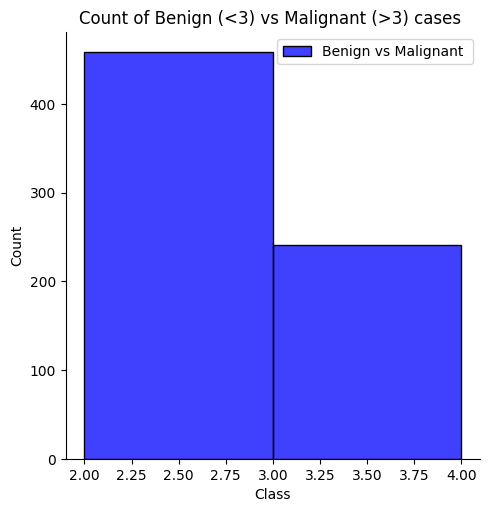

In [8]:
#Show the number of malignant vs benign tumours in the dataset
sns.displot(breastCancerData, x="Class", bins=2, label= "Benign vs Malignant ",color="blue") 
plt.title("Count of Benign (<3) vs Malignant (>3) cases ")
plt.legend()
plt.show()

Benign cells were denoted by a 2 within the dataset and malignant cells were denoted by a 4 in the dataset. The barchart above visibly shows  that there were about twice as much benign tumours in the dataset when compared to malignant cells. 

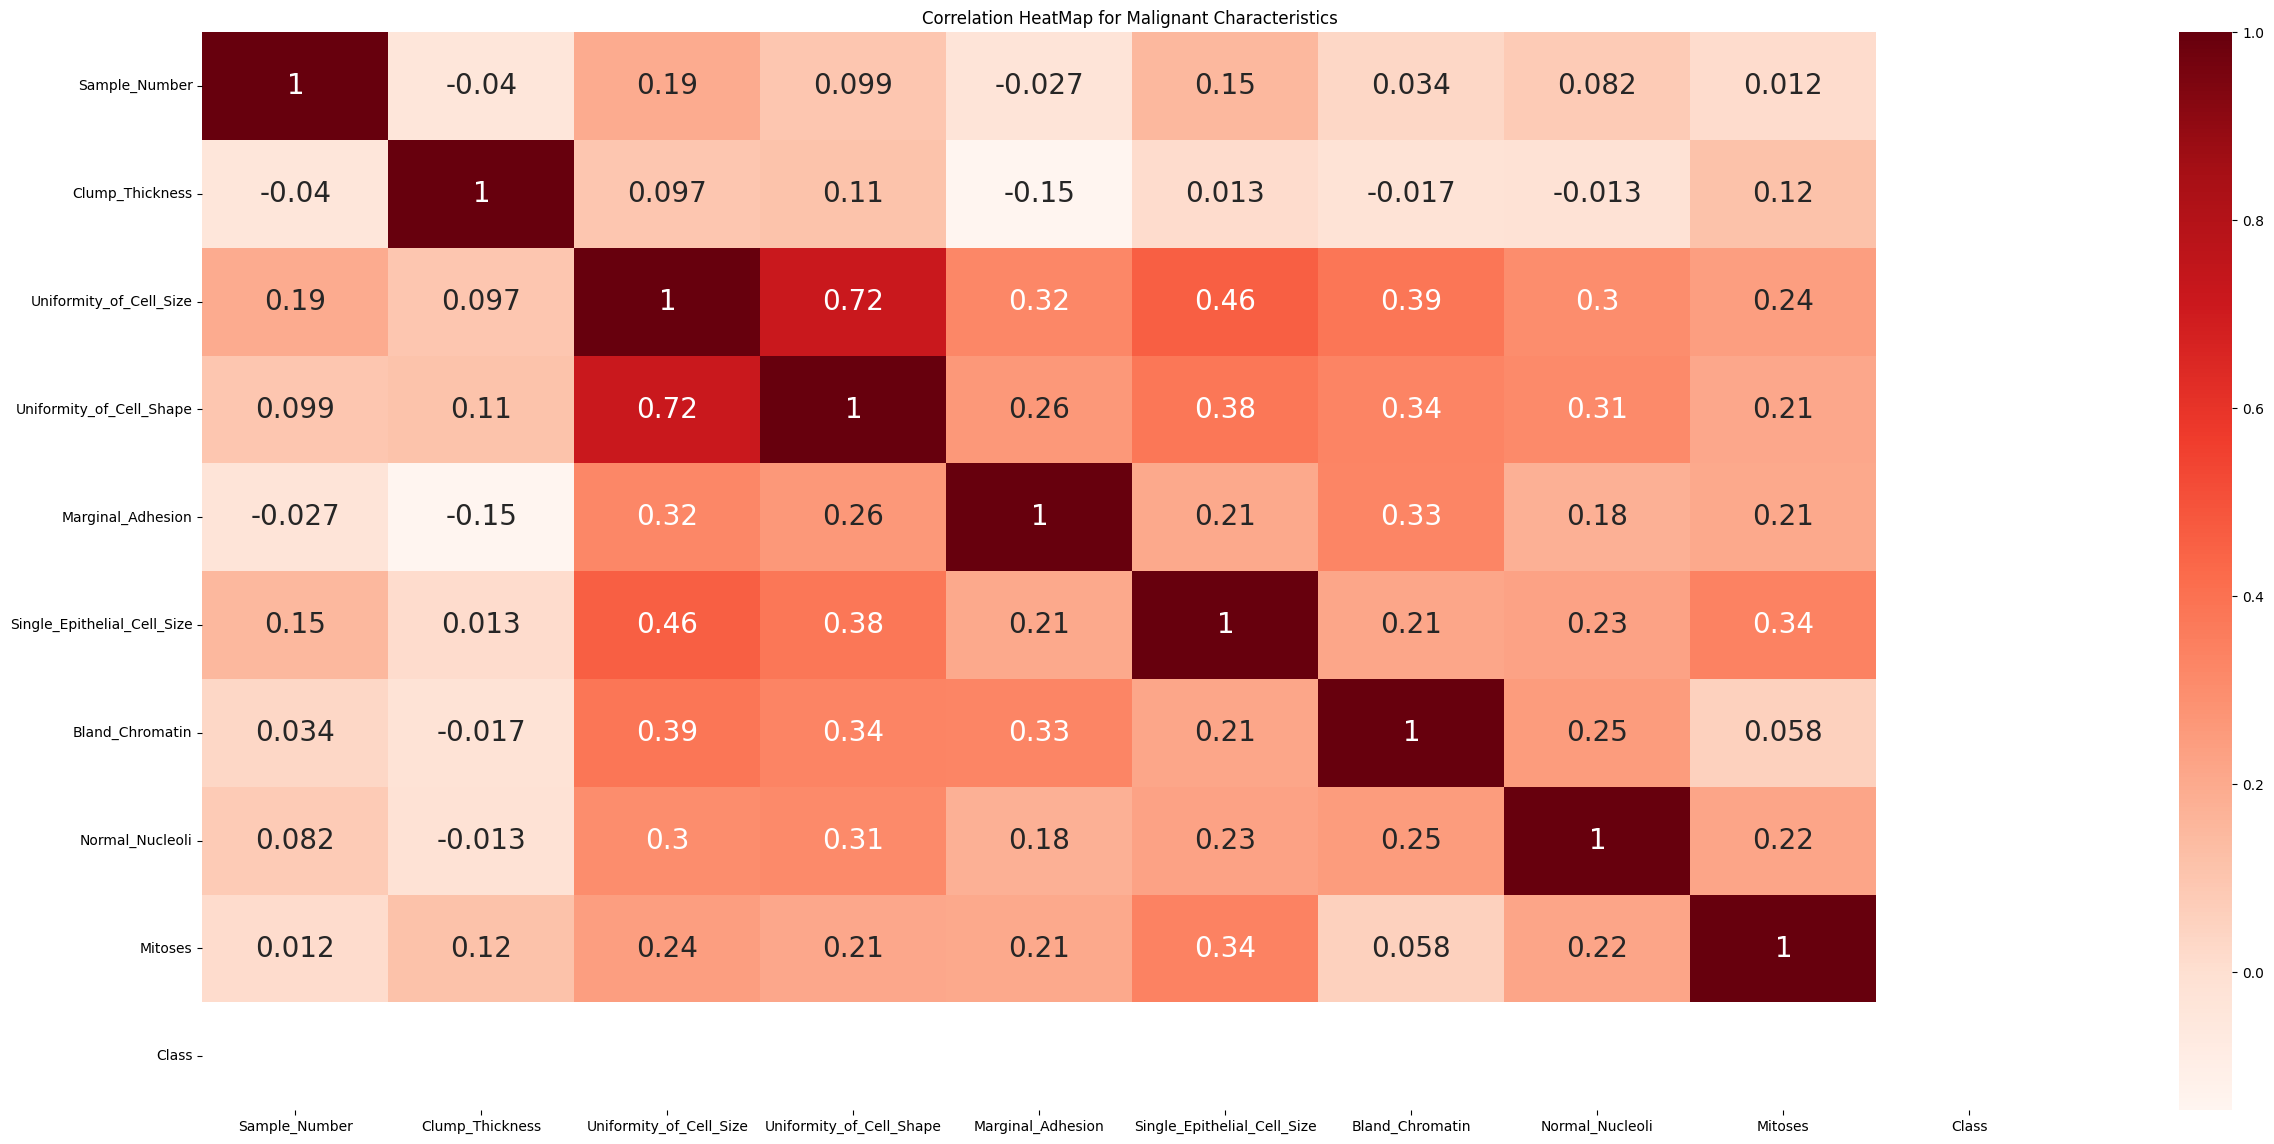

In [9]:
plt.figure(figsize=(30,14)) 

sns.heatmap(malignant_data.corr(),annot=True,cmap='Reds', annot_kws={'size': 20})
plt.title("Correlation HeatMap for Malignant Characteristics ")
plt.show()

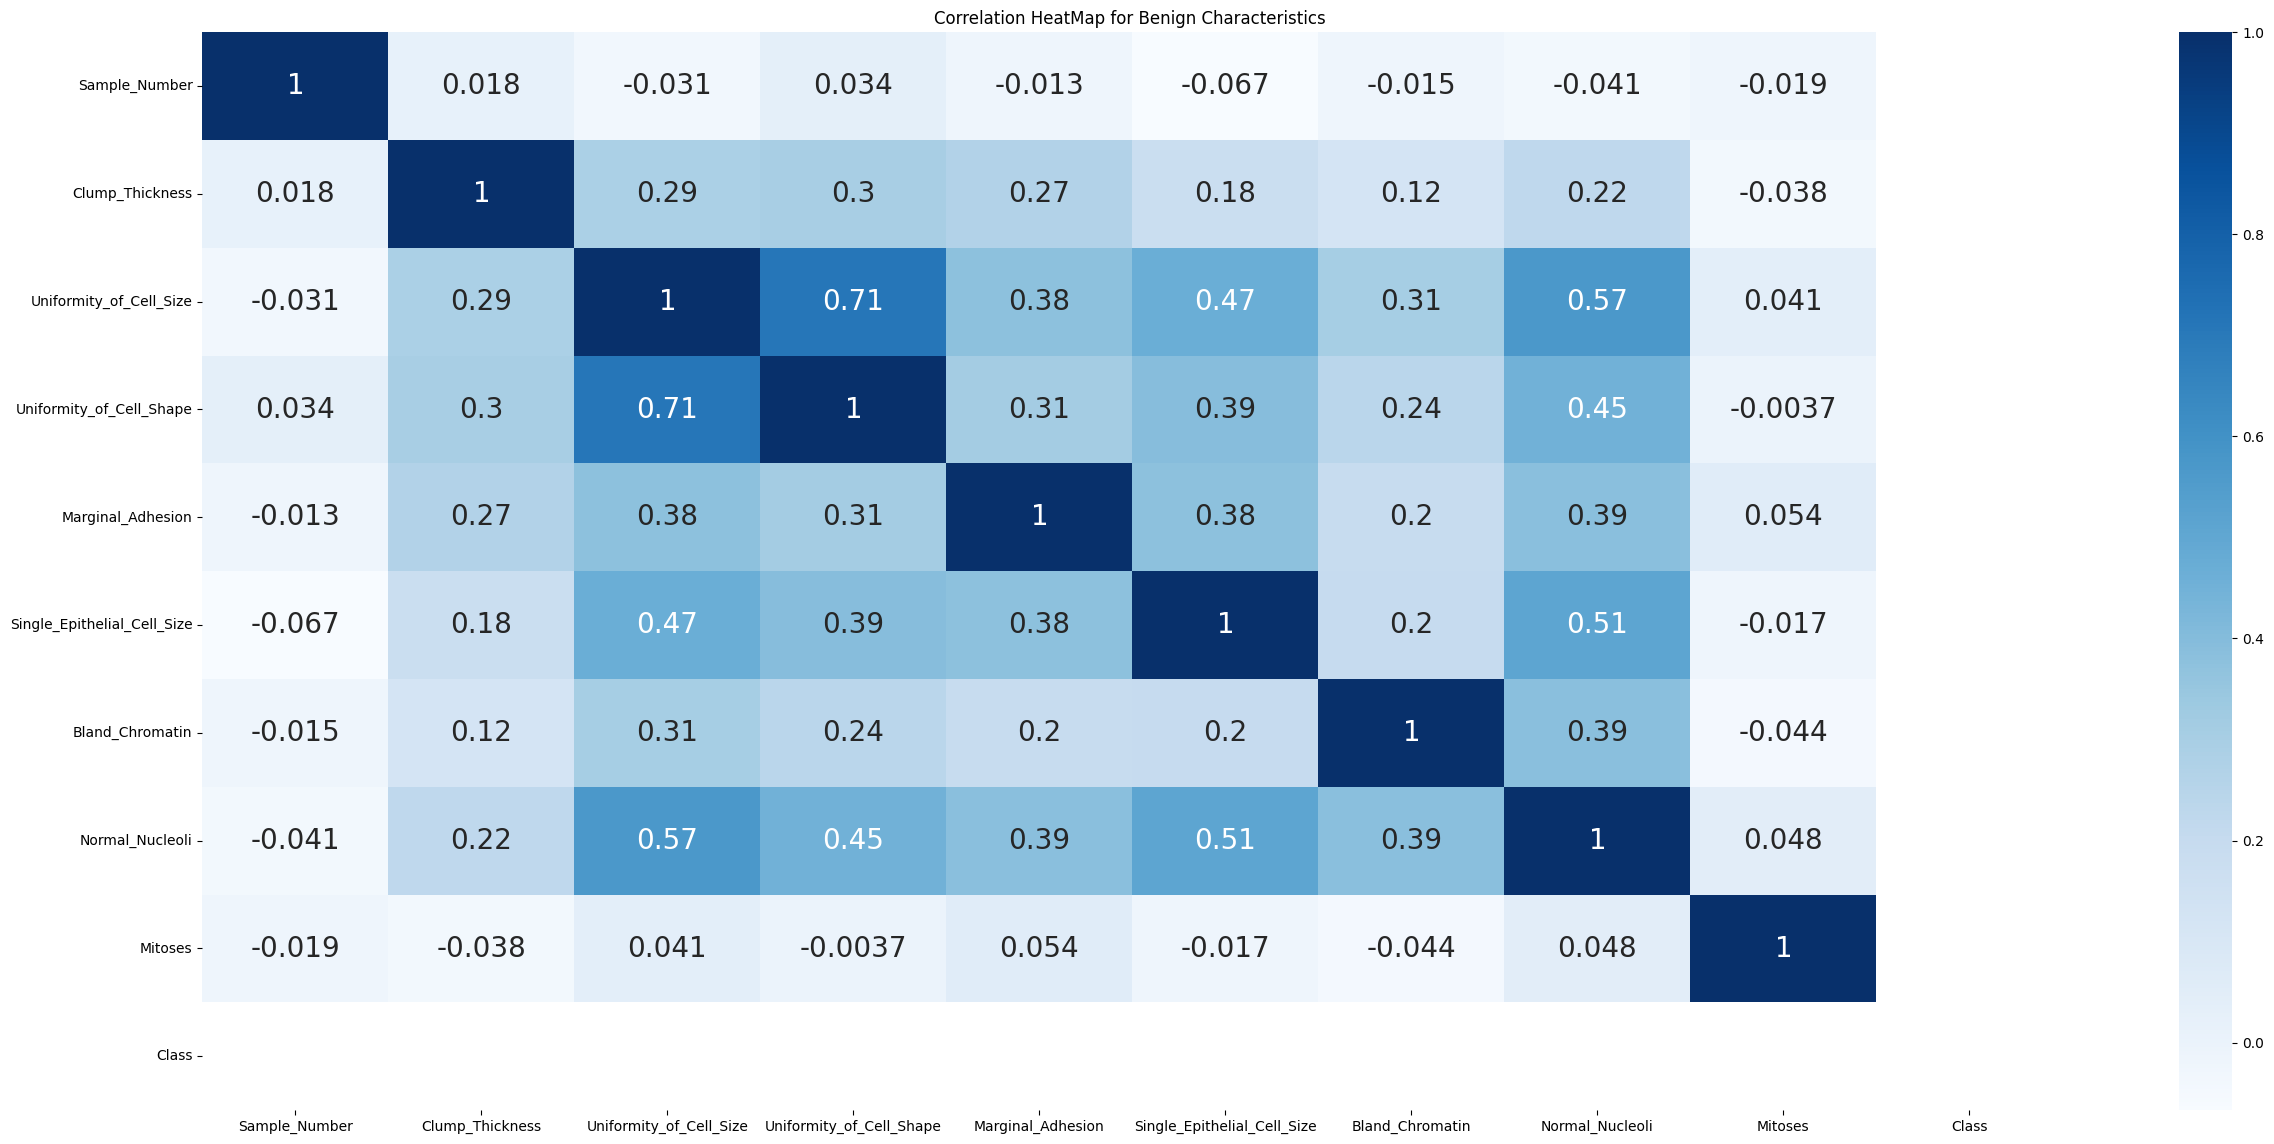

In [10]:
plt.figure(figsize=(30,14)) 

sns.heatmap(benign_data.corr(),annot=True,cmap='Blues', annot_kws={'size': 20})
plt.title("Correlation HeatMap for Benign Characteristics ")
plt.show()

From the data presented in the heat map there is no strong correlation or defining difference between the two datasets. The strongest correlation between characterisitics is between the Uniformity of cell shape and Uniformity of cell size, this is seen in both the malignant dataset and the bengign dataset. This is to be expected, both measurements largely mirror each other so there's no concluding evidence that either are impacted by the class of the Cancer. 

Interestingly, there is a stonger correlation between the Normal Nucleoli and the Uniformity of the Cell in Benign tumours than seen with the same measurements for Malignant cases (0.57 vs 0.3). 

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15), tight_layout=False) 

  

def distributionGraphs_malignant(measurement, position): 

    plt.subplot(9, 2, position) 

    plt.hist( malignant_data[measurement], color = 'red', edgecolor = 'black',bins = 10)

    plt.xlabel(measurement, size = 9) 

    plt.ylabel('Number of cases', size = 9) 

     

def distributionGraphs_benign(measurement, position): 

    plt.subplot(9, 2, position) 

    plt.hist( benign_data [measurement], color = 'blue', edgecolor = 'black',bins = 10) 

    plt.xlabel(measurement, size = 9) 

    plt.ylabel('Number of cases', size = 9) 

  

distributionGraphs_malignant('Uniformity_of_Cell_Size', 1) 

plt.title('Hist: Uniformity_of_Cell_Size of Malignant Case', size = 9) 

distributionGraphs_benign('Uniformity_of_Cell_Size', 2) 

plt.title('Hist: Uniformity_of_Cell_Size of Benign Case', size = 9) 

distributionGraphs_malignant('Uniformity_of_Cell_Shape', 3) 

plt.title('Hist: Uniformity_of_Cell_Shape of Malignant Case', size = 9) 

distributionGraphs_benign('Uniformity_of_Cell_Shape', 4) 

plt.title('Hist: Uniformity_of_Cell_Shape of Benign Case', size = 9) 

distributionGraphs_malignant('Mitoses', 5) 

plt.title('Hist: Mitoses of Malignant Case', size = 9) 

distributionGraphs_benign('Mitoses', 6) 

plt.title('Hist: Mitoses of Benign Case', size = 9) 

distributionGraphs_malignant('Normal_Nucleoli', 7) 

plt.title('Hist: Normal_Nucleoli of Malignant Case', size = 9) 

distributionGraphs_benign('Normal_Nucleoli', 8) 

plt.title('Hist: Normal_Nucleoli of Benign Case', size = 9) 

distributionGraphs_malignant('Bland_Chromatin', 9) 

plt.title('Hist: Bland_Chromatin of Malignant Case', size = 9) 

distributionGraphs_benign('Bland_Chromatin', 10) 

plt.title('Hist: Bland_Chromatin of Benign Case', size = 9) 

distributionGraphs_malignant('Bare_Nuclei', 11) 

plt.title('Hist: Bare_Nuclei of Malignant Case', size = 9) 

distributionGraphs_benign('Bare_Nuclei', 12) 

plt.title('Hist: Bare_Nuclei of Benign Case', size = 9) 


distributionGraphs_malignant('Single_Epithelial_Cell_Size', 13) 

plt.title('Hist: Single_Epithelial_Cell_Size of Malignant Case', size = 9) 

distributionGraphs_benign('Single_Epithelial_Cell_Size', 14) 

plt.title('Hist: Single_Epithelial_Cell_Size of Benign Case', size = 9) 



distributionGraphs_malignant('Clump_Thickness', 15) 

plt.title('Hist: Clump_Thickness of malignant Case', size = 9) 

distributionGraphs_benign('Clump_Thickness', 16) 

plt.title('Hist: Clump_Thickness of Benign Case', size = 9) 


distributionGraphs_malignant('Marginal_Adhesion', 17) 

plt.title('Hist: Marginal_Adhesion of malignant Case', size = 9) 


distributionGraphs_benign('Marginal_Adhesion', 18) 

plt.title('Hist: Marginal_Adhesion of Benign Case', size = 9) 



Text(0.5, 1.0, 'Hist: Marginal_Adhesion of Benign Case')

The histograms above give a really good insight into the difference in characteristics seen between benign and malignant tumours. Instantly it becomes appearent from the histograms that malignant cases have a greater distribution across all characteristics. Malignant characteristics are often classed on the higher range of the scale as seen for Marginal Adhesion, Clump Thickness, Normal Nucleoli, Size, Bland Chromatin, Epithelian Cell Size, Cell Shape, and Cell Size. The only two characteristics that do not seem to give an indication as to whether a tumour is malignant or benign is the Mitosis or the Bare Nuclei as both of these characteristics are similarily graded as the benign tumours. 

## 3.3. Build Model - Machine Learning and Predictions 

<b> 3.3.1 Defining the setup 

In [ ]:
#Note had some trouble with data, kept getting error message that it could no convert string to float. From the data.info function i could see that 'Bare_Nuclei' was the only object. I removed that column from the study however better practice would be to convert the data from an object to a int . 
#prediction_var does not contain the 'class' column that is to be analyses in test/train y 
prediction_vars = ["Clump_Thickness","Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bland_Chromatin","Normal_Nucleoli","Mitoses"]

In [ ]:
###New train 
from sklearn.model_selection import train_test_split


train, test = train_test_split(breastCancerData, test_size=0.15, random_state=1)

train_x = train[prediction_vars]
train_y = train ['Class']
test_x = test[prediction_vars]
test_y = test['Class']

In [ ]:
#Define Model types 
model_RFC = RandomForestClassifier()
model_KNC = KNeighborsClassifier()
model_SVC = SVC()
model_MLPC = MLPClassifier()


<i>Random Forest Classifier 
    
 RFC is a estimator that is suited for a number of decision tree classifiers that operate as an ensemble. Each decision splits out a class of prediction and the class that contains the most votes becomes the model's prediction. The low correlations between the decisions is important for the structure of this classifier [12]
    
<i>KNeighbors Classifier 
    
A simple and common classifier used wihtin the finance, healthcare, political and science industry. It is a non-parametric algorithm i.e. no assumption for underlying distribution. This type of strucuture is useful for datasets that do not follow theorectical assumptions. Trainng is not necessary on to generate this model.[13]
    
<i>SVC classifier 
    
SVC or Support Vector Classifier, it operates by mapping datapoints to a high dimensional space. [14]
    
<i>MLPC Classifier 
    
MLPC stands for Multi-layer Perceptron classifier [15] It is a feedforward artificaial neural network model that maps inputs to a set of appropriate outputs. It's a multi-layer paradigm with each layer connected to the next [16].

<b> 3.3.2 Training the Models

In [ ]:
model_RFC.fit(train_x, train_y)
model_KNC.fit(train_x, train_y)
model_SVC.fit(train_x, train_y)
model_MLPC.fit(train_x, train_y)

In [ ]:
predictions_RFC = model_RFC.predict(test_x)
predictions_KNC = model_KNC.predict(test_x)
predictions_SVC = model_SVC.predict(test_x)
predictions_MPLC = model_MLPC.predict(test_x)

<b> 3.3.3 Applying a confustion matrix to the Models

In [ ]:
confusion_RFC = confusion_matrix(test_y, predictions_RFC)
confusion_KNC = confusion_matrix(test_y, predictions_KNC)
confusion_SVC = confusion_matrix(test_y, predictions_SVC)
confusion_MPLC = confusion_matrix(test_y, predictions_MPLC)

print("\n__________________ Confusion Matrix ___________________________________")
print("\n Confusion matrix for RandomForestClassifier Model is:\n", confusion_RFC)
print("\n Confusion matrix for KNeighborsClassifier Model is:\n", confusion_KNC)
print("\n Confusion matrix for SVClassifier Model is:\n", confusion_SVC)
print("\n Confusion matrix for MLPClassifier Model is:\n", confusion_MPLC)
print("\n______________________________________________________________________")

The confusion matrix represents a table layout consisting of different resulting outcomes of the prediction. It creates a table of all the predicred and actual values of the calssifier. [11]

<img src = "images/table.png">

<b> 3.3.4. Measuring Accuracy of the Models

In [ ]:

accuracy_RFC = accuracy_score(test_y, predictions_RFC)
accuracy_KNC = accuracy_score(test_y, predictions_KNC)
accuracy_SVC = accuracy_score(test_y, predictions_SVC)
accuracy_MPLC = accuracy_score(test_y, predictions_MPLC)

print("\n__________________ Confusion Matrix ___________________________________")
print("\n accuracy_score for RandomForestClassifier Model is: %.2f \n" % accuracy_RFC)
print("\n accuracy_score for KNeighborsClassifier Model is: %.2f \n" % accuracy_KNC)
print("\n accuracy_score for SVClassifier Model is: %.2f \n" % accuracy_SVC)
print("\n accuracy_score for MLPClassifier Model is: %.2f \n" % accuracy_MPLC)
print("\n______________________________________________________________________")


### 4.  Conclusion

The dataset of Wiscoin with evaluated using basic commands such as describe, info, shape to get an overview of the data. Then python packages were used to synthesis graphical data representations. Fianlly Machine learning algorithms were inputted to predict the outcome of the cells being malignant or benign. 

From the dataset review the following can be concluded: 
- Malignant cells are more unpredicable than benign cells in breast tumours. This was seen in the standard deviation and the distribution in the histograms. 
- Though little correclation was seen in the characteristics in malignant or benign cells there was a greater correlation between Normal Nuceloi in benign cells. 
- Machine learning can be useful to predict whether a case is benign or malignant. There are different levels of accuracy based on the model choosen. In the case of this analyis both the random forest classifier and the Kneighbors Classifier out preformed the SVC and MLPC classifier. 

###  5. References 

1. Assessment 1 - Functionality of graphs 
2. Data source - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
3. Machine learning Statistical analysis of Breast Cancer https://www.mdpi.com/2227-9032/8/2/111
4. Diagnosing breast cancer with AI // Coding for Medicine  https://www.youtube.com/watch?v=c8s5GKRrenY
5. Models : https://www.youtube.com/watch?v=2ncx2q5GHbQ
6. HSE Symptoms-Breast cancer in women https://www2.hse.ie/conditions/breast-cancer-women/?gclid=CjwKCAiA2fmdBhBpEiwA4CcHzUVokFpuRZxHSqjE2BnnNYNBc_9dQYNy_A3TVzJiiMJqk8pVHGEbdRoCNfAQAvD_BwE&gclsrc=aw.ds
7. https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer?gclid=CjwKCAiA2fmdBhBpEiwA4CcHzTsXgRBxQ_PLgInmQAi-qy-lJRt3mbuv9rSWHEk5W9nqBHpXLDp-ORoCJZsQAvD_BwE
8. Genetics of Breast Cancer
https://www.sciencedirect.com/science/article/abs/pii/S0025619611647307
9. Genetics of breast cancer: a topic in evolution https://www.sciencedirect.com/science/article/pii/S0923753419344813
10. Prediction of breast cancer using voting classifier technique https://ieeexplore.ieee.org/abstract/document/8089135
11. Confusion Matrix  https://www.simplilearn.com/tutorials/machine-learning-tutorial/confusion-matrix-machine-learning#:~:text=A%20confusion%20matrix%20presents%20a,actual%20values%20of%20a%20classifier.
12. Random Forest Clasifier. https://towardsdatascience.com/understanding-random-forest-58381e0602d2
13. KNN Classification https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
14. SVC https://vitalflux.com/svm-classifier-scikit-learn-code-examples/#:~:text=SVC%2C%20or%20Support%20Vector%20Classifier,the%20data%20into%20two%20classes. 
15. MLPC https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
16. MLPC https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/